In [22]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(cowplot)

In [4]:
df = read.csv('../../results/08_mouse_ssc/04_fib_subclustering/cell_propotion.csv', row.names = 1)

In [5]:
head(df)

,sample,leiden,proportion,time_point
,<chr>,<int>,<dbl>,<chr>
0,day0_sample1,0,0.33710542,day0
1,day3_sample1,0,0.43346008,day3
2,day3_sample2,0,0.06304348,day3
3,day7_sample1,0,0.01646413,day7
4,day7_sample2,0,0.39433618,day7
5,day14_sample1,0,0.15646941,day14


In [9]:
df <- df %>%
    dplyr::group_by(leiden, time_point) %>%
    dplyr::summarise(mean_prop = mean(proportion))

`summarise()` has grouped output by 'leiden'. You can override using the
`.groups` argument.


In [11]:
head(df)

leiden,time_point,mean_prop
<int>,<chr>,<dbl>
0,day0,0.33710542
0,day14,0.17916235
0,day28,0.17005938
0,day3,0.24825178
0,day7,0.20540015
1,day0,0.01310304


In [15]:
df$time_point <- stringr::str_replace_all(df$time_point, c("day" = ""))
df$time_point <- as.integer(df$time_point)

In [18]:
df$leiden <- as.factor(df$leiden)

In [19]:
head(df)

leiden,time_point,mean_prop
<fct>,<int>,<dbl>
0,0,0.33710542
0,14,0.17916235
0,28,0.17005938
0,3,0.24825178
0,7,0.20540015
1,0,0.01310304


In [24]:
df <- subset(df, leiden %in% c(0, 5, 4, 6))

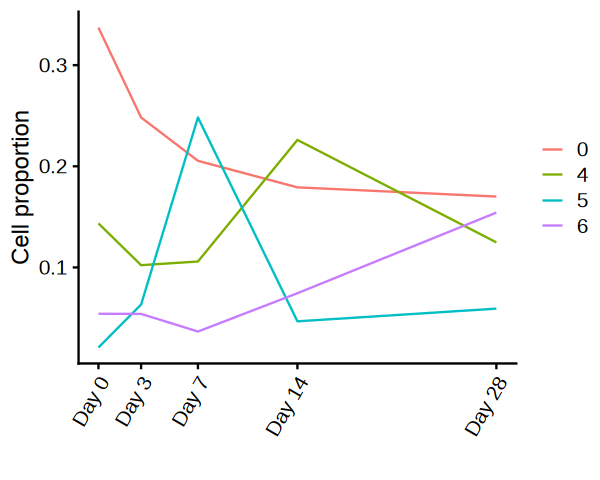

In [33]:
options(repr.plot.height = 4, repr.plot.width = 5)

p <- ggplot(data = df, aes(x = time_point, y = mean_prop)) +
    geom_line(aes(color = leiden)) +
    scale_x_continuous(breaks = c(0, 3, 7, 14, 28), 
                       labels = c("Day 0", "Day 3", "Day 7", "Day 14", "Day 28")) +
    xlab("") + ylab("Cell proportion") +
    theme_cowplot() +
    theme(legend.title = element_blank(),
         axis.text.x = element_text(hjust = 1, angle = 60))

print(p)